# Exercici pràctic. Unitats 1-4. Preprocessament i Regressió linial.

## World Happiness Report

## Presentació del dataset

El *World Happiness Report* és una enquesta històrica sobre l'estat de la felicitat global, i segons experts en diferents camps, es pot utilitzar per avaluar el progrés de les nacions. Aquests informes, revisen l'estat de la felicitat al món actual i mostren com la nova ciència de la felicitat explica les variacions personals i nacionals de la felicitat.

El dataset que se us presenta està basat en base a diversos datasets sobre aquesta enquesta, que podeu trobar a [Kaggle](https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2021).

Les columnes de què consta aquest dataset són:

* "escala_vida": La puntuació sobre la felicitat obtinguda en l'enquesta.
* "log_gdp": És el logaritme del PIB per càpita de cada país. Bàsicament, aquesta el que mesura és la riquesa del pais. Sol usar-se aquesta mesura en lloc del PIB perquè aquest creix exponencialment, i el logaritme dóna una mesura més fàcil de gestionar.
* "suport_social":  Reflecteix, de forma numèrica la percepció que tenen les persones de ser cuidades i tenir assistència d'altres persones.
* "esperança_vida": L'esperança de vida del pais
* "llibertat_vida": La llibertat que es dona a les persones per escollir el seu estil de vida.
* "generositat": Fa referència a la quantitat de persones que realitza donacions en un país.
* "percepcio_corrupcio": Es tracta de la percepció social que es té sobre la corrupció a les institucions d'un país.

S'han eliminat algunes columens originals, com l'any de l'enquesta i el pais per tal de facilitar la tasca.

El paràmetre que ens interessarà predir serà l'escala de vida en funció de la resta de paràmetres.

## Pas 1. Emmarcar el problema. 

**Contesta les següents preguntes sobre l'enunciat**

* Quin és l'objectiu?
* Quines són les característiques del problema? (supervisat/no supervisat, batch/en línia)
* Quin tipus de problema es tracta? (regressió, classificació, etc). I segons això, quines mesures de rendiment podríem utilitzar?
* Tenim algun problema comparable?

## Pas 2. Otenció de les dades.

El fitxer se us proporciona com un CSV, amb nom `index-felicitat-num.csv`. Guarda'l en una carpeta `dataset` i crea un funció `carrega_dades` que carregue aquest fitxer i el retorne com un DataFrame de Pandas. Fes ús de la funció per carregar les dades amb les què anirem treballant els pròxims apartats. Examina les primeres columnes per veure'n quines dades conté.

In [5]:
%pip install pandas
%pip install scikit-fuzzy
%pip install experta
%pip install matplotlib
%pip install scipy


You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [49]:
import pandas as pd
import numpy as np

df_data = pd.read_csv('index-felicitat.csv')

## Pas 3. Exploració de les dades.

Anem a explorar les dades del Dataset. Per a això, obté, inicialment la següent informació:

* Informació sobre les columnes i la quantitat de nuls que tinguen aquestes
* Descripció estadística del dataset, incloent mitjanes, desviació, màxim, mínim i quartils
* Comprova si hi ha files duplicades
* Mostra els histogrames per a les diferents variables

In [51]:
df_data.head()

,escala_vida,log_gdp,suport_social,esperança_vida,llibertat_vida,generositat,percepcio_corrupcio
0,5.085,8.716,0.792,67.14,0.87975,0.000,0.783125
1,4.369,7.880,0.633,54.70,0.74600,-0.057,0.519000
2,6.062,9.782,0.893,68.00,0.83200,-0.158,0.471000
3,5.138,10.144,0.874,66.24,0.61100,-0.230,0.793000
4,3.792,6.723,0.326,49.66,0.42700,-0.019,0.718000


In [53]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   escala_vida          1465 non-null   float64
 1   log_gdp              1457 non-null   float64
 2   suport_social        1465 non-null   float64
 3   esperança_vida       1462 non-null   float64
 4   llibertat_vida       1465 non-null   float64
 5   generositat          1457 non-null   float64
 6   percepcio_corrupcio  1465 non-null   float64
dtypes: float64(7)
memory usage: 80.2 KB


In [56]:
df_data.describe()
print(df_data.describe())

       escala_vida      log_gdp  suport_social  esperança_vida  \
count  1465.000000  1457.000000    1465.000000     1462.000000   
mean      5.462673     9.371928       0.811738       63.551807   
std       1.112481     1.157552       0.118370        7.524282   
min       2.375000     6.635000       0.290000       32.300000   
25%       4.640000     8.470000       0.747000       58.976000   
50%       5.386000     9.460000       0.832000       65.270000   
75%       6.278000    10.370000       0.905000       68.800000   
max       8.019000    11.648000       0.987000       77.100000   

       llibertat_vida  generositat  percepcio_corrupcio  
count     1465.000000  1457.000000          1465.000000  
mean         0.745927    -0.000661             0.740897  
std          0.140838     0.160325             0.187847  
min          0.258000    -0.316000             0.035000  
25%          0.650000    -0.117000             0.680000  
50%          0.766000    -0.023000             0.794000  

In [57]:
duplicados = df_data.duplicated()
print(duplicados)

0       False
1       False
2       False
3       False
4       False
        ...  
1460    False
1461    False
1462    False
1463    False
1464    False
Length: 1465, dtype: bool


In [27]:
%pip install seaborn

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


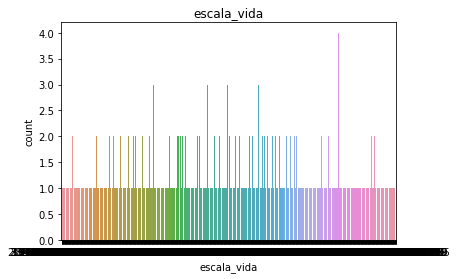

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='escala_vida', data=df_data)
plt.title('escala_vida')
plt.show()

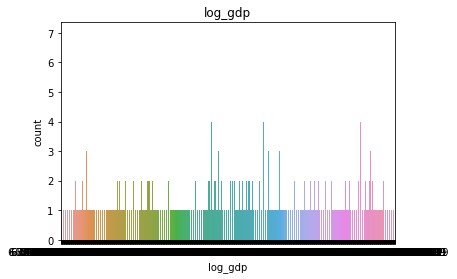

In [59]:
sns.countplot(x='log_gdp', data=df_data)
plt.title('log_gdp')
plt.show()

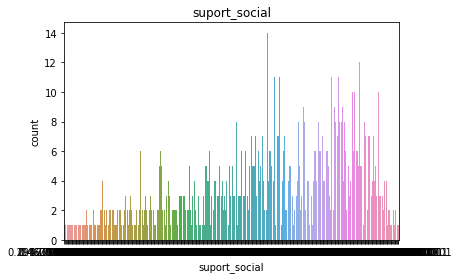

In [60]:
sns.countplot(x='suport_social', data=df_data)
plt.title('suport_social')
plt.show()

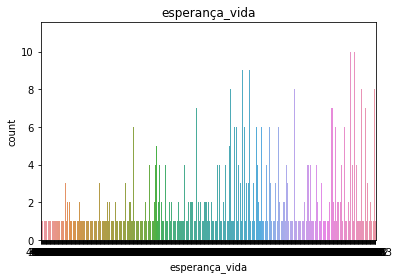

In [61]:
sns.countplot(x='esperança_vida', data=df_data)
plt.title('esperança_vida')
plt.show()

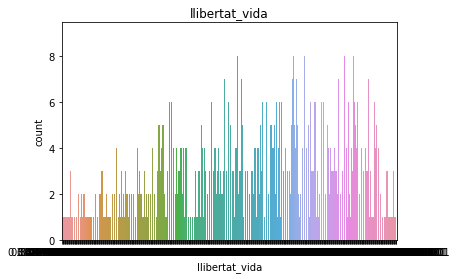

In [64]:
sns.countplot(x='llibertat_vida', data=df_data)
plt.title('llibertat_vida')
plt.show()

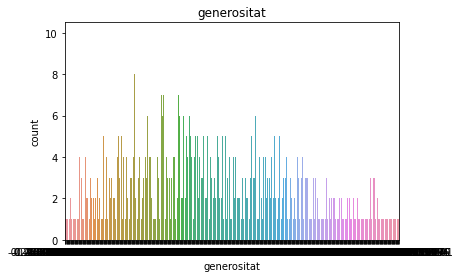

In [62]:
sns.countplot(x='generositat', data=df_data)
plt.title('generositat')
plt.show()

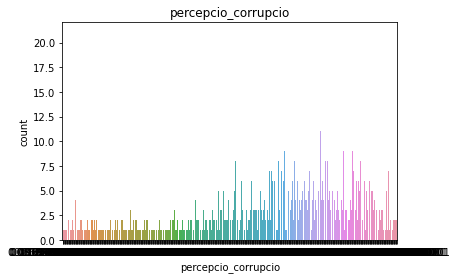

In [63]:
sns.countplot(x='percepcio_corrupcio', data=df_data)
plt.title('percepcio_corrupcio')
plt.show()

### Informació de nuls

Seguint amb l'exploració de les dades, una vegada hem fet un primer anàlisi d'aquestes, anem a veure si hi ha valors nuls i com tractar-los, encara que ja ho sabem de l'exploració inicial. Per a això:

* Obté la quantitat de valors nuls que hi ha per cada columna
* Obé les columnes que contenen nuls 

In [65]:
df_data.isnull().sum()

escala_vida            0
log_gdp                8
suport_social          0
esperança_vida         3
llibertat_vida         0
generositat            8
percepcio_corrupcio    0
dtype: int64

### Estudiar correlacions

Per veure la correlació entre les diferents variable es demana:

* Mostra la matriu de correlació entre les variables
* Fes una representació en un mapa de calor
* Realitza un diagrama de punts amb les variables més prometedores.

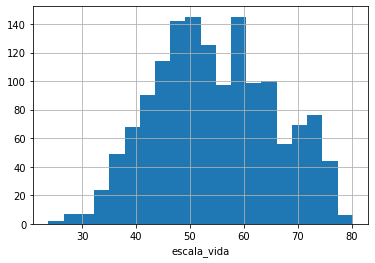

In [89]:
df_data['escala_vida'] = df_data['escala_vida'] /100

df_data['escala_vida'].hist(bins=20)
plt.xlabel('escala_vida')
plt.show()

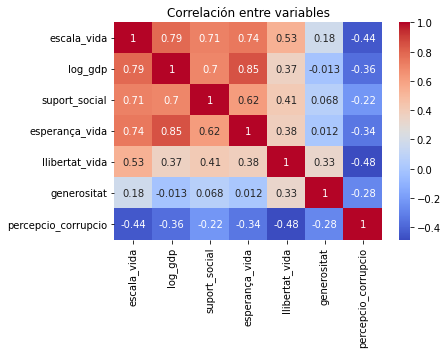

In [66]:
sns.heatmap(df_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlació entre variables')
plt.show()

<AxesSubplot:xlabel='percepcio_corrupcio', ylabel='generositat'>

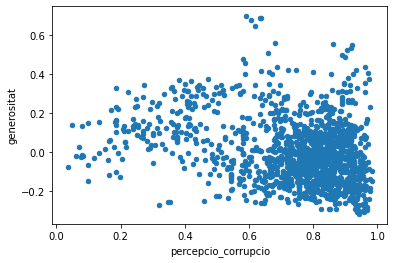

In [94]:
df_data.plot(kind="scatter", x="percepcio_corrupcio", y="generositat")

### Detecció d'Outliers

Dibuixa els diagrames de caixes per a cada variable, per tal de detectar possibles valors anòmals.

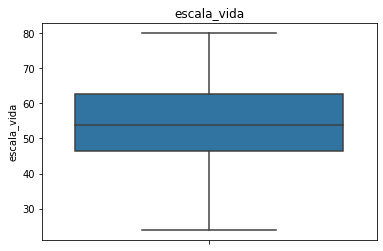

In [105]:
sns.boxplot(y='escala_vida', data=df_data)
plt.title('escala_vida')
plt.show()

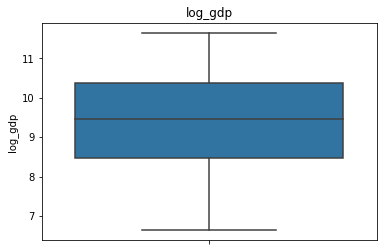

In [106]:
sns.boxplot(y='log_gdp', data=df_data)
plt.title('log_gdp')
plt.show()

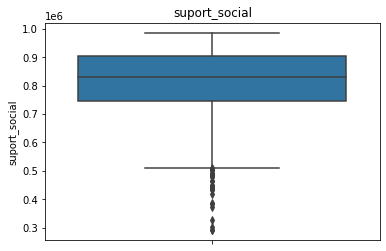

In [107]:
sns.boxplot(y='suport_social', data=df_data)
plt.title('suport_social')
plt.show()

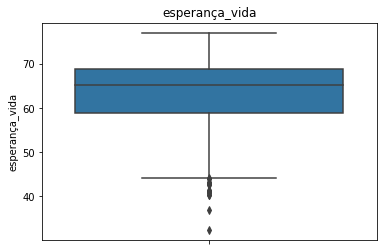

In [108]:
sns.boxplot(y='esperança_vida', data=df_data)
plt.title('esperança_vida')
plt.show()

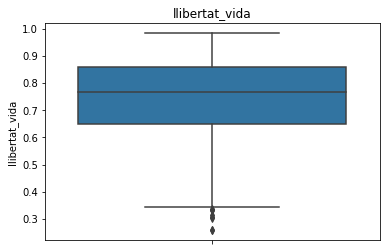

In [109]:
sns.boxplot(y='llibertat_vida', data=df_data)
plt.title('llibertat_vida')
plt.show()

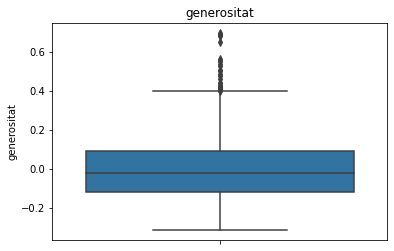

In [110]:
sns.boxplot(y='generositat', data=df_data)
plt.title('generositat')
plt.show()

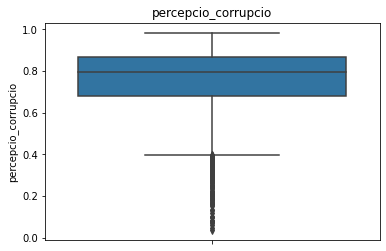

In [111]:
sns.boxplot(y='percepcio_corrupcio', data=df_data)
plt.title('percepcio_corrupcio')
plt.show()

# Pas 4. Preparació de les dades per als algorismes de ML

Anem a preparar diverses funcionalitats per preparar les dades per als algorismes d'aprenentatge automàtic. Concretament, se us demana:

* Prova com eliminar els duplicats que puguen haver-hi.
* Separa el conjunt de dades en un conjunt d'entrenament, amb el 70% de les dades i un de prova amb el 30%. A partir d'ara treballareu amb el conjunt d'entrenament i utilitzarem al final el de prova.
* Crea una instància de SimpleImputer per imputar els valors nuls amb el valor de la mitjana, i comprova que aquest compleix el seu propòsit (és a dir, aplica l'imputador i comprova que després no hi ha nuls).

## Transformacions interessants

* Podríes millorar els conjunts de dades amb algunes transformacions interessants, per exemple logarítmiques? Sobre quines columnes?

## Preparació del transformador per al preprocessament

Prepara ara un script en Python per automatitzar tot el procés anterior:

* Carreuges les dades del fitxer
* Elimines els duplicats
* Separa el conjunt de proves (amb el 30%) i el d'entrenament (70%)
* Prepara un ColumnTransformes per realitzar un escalat estàndard
* Prepara un Pipeline que:
  1. Utilitze el teu imputador dels valors nuls,
  2. Ralitze un escalat


## Preparació i entrenament de l'algorisme

* Separa ara la columna `escala_vida` del conjunt de dades, i crea un nou dataframe com a còpia d'aquesta columna, ja que seran les nostres etiquetes.

* Entrena un model de regressió linial, amb les dades d'entrenament.

* Una vegada entrenat l'algorisme, calcula i mostra les mètriques MAE, MSE, RMSE i R2, tant per al conjunt d'entrenament om per al conjunt de prova. Recorda que el conjunt de prova l'hauràs de preprocessar també.